# Import packages

In [1]:
import os
import cmaps
import cmocean
import numpy as np
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata
from netCDF4 import Dataset
from datetime import date
from xarrayMannKendall import Mann_Kendall_test
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import Polygon
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
rcParams['font.family'] = 'sans-serif'
directory   = '/srv/scratch/z3533156'

# Read meridional heat transport from BRAN

In [2]:
##############################################################
dataset0          = sio.loadmat(directory+'/BRAN_MHW/SO/daily/Figure2_mean.mat')
bran_lon          = dataset0['bran_lon'][:,:]
bran_lat          = dataset0['bran_lat'][:,:]
bran_vt_transport = dataset0['bran_vt_transport_monthly_mean'][:,:]
ARC_vt_transport  = bran_vt_transport[1:500,152:503]     # AR
EAC_vt_transport  = bran_vt_transport[1449:1650,152:403] # EAC
BC_vt_transport   = bran_vt_transport[2949:3200,102:403] # BC
ARC_lon           = bran_lon[1:500,152:503]     # AR
EAC_lon           = bran_lon[1449:1650,152:403] # EAC
BC_lon            = bran_lon[2949:3200,102:403] # BC
ARC_lat           = bran_lat[1:500,152:503]     # AR
EAC_lat           = bran_lat[1449:1650,152:403] # EAC
BC_lat            = bran_lat[2949:3200,102:403] # BC
##############################################################
dataset2          = sio.loadmat(directory+'/BRAN_MHW/SO/daily/Figure3_vt_transport.mat')
ARC_vt_loc        = dataset2['ARC_vt_loc'][:,:]
ARC_vt_trans_lat  = dataset2['ARC_vt_trans_lat'][:,:]
EAC_vt_loc        = dataset2['EAC_vt_loc'][:,:]
EAC_vt_trans_lat  = dataset2['EAC_vt_trans_lat'][:,:]
BC_vt_loc         = dataset2['BC_vt_loc'][:,:]
BC_vt_trans_lat   = dataset2['BC_vt_trans_lat'][:,:]
#################################################################################################
ds1 = xr.Dataset(data_vars=dict(ARC_vt_trans_lat=(["latitude","time"], ARC_vt_trans_lat)))
ARC_vt_trans_lat0 = ds1.ARC_vt_trans_lat
ARC_vt_trans_lat1 = ARC_vt_trans_lat0.sortby('time')
ARC_vt_trans_lat  = Mann_Kendall_test(ARC_vt_trans_lat1,'time',MK_modified=True,method="linregress",alpha=0.05,
                                coords_name = {'time':'time','x':'latitude'})
ARC_vt_trans_lat_trend = ARC_vt_trans_lat.compute()
ARC_vt_trend=ARC_vt_trans_lat_trend.trend*120
ARC_vt_trend1=ARC_vt_trans_lat_trend.trend*120
ARC_vt_std=ARC_vt_trans_lat_trend.std_error*120
ARC_vt_p=ARC_vt_trans_lat_trend.p.values
ARC_vt_trend1[np.where(ARC_vt_p > 0.05)] = np.nan
ARC_vt_std[np.where(ARC_vt_p   > 0.05)] = np.nan

ds2 = xr.Dataset(data_vars=dict(EAC_vt_trans_lat=(["latitude","time"], EAC_vt_trans_lat)))
EAC_vt_trans_lat0 = ds2.EAC_vt_trans_lat
EAC_vt_trans_lat1 = EAC_vt_trans_lat0.sortby('time')
EAC_vt_trans_lat  = Mann_Kendall_test(EAC_vt_trans_lat1,'time',MK_modified=True,method="linregress",alpha=0.05,
                                coords_name = {'time':'time','x':'latitude'})
EAC_vt_trans_lat_trend = EAC_vt_trans_lat.compute()
EAC_vt_trend=EAC_vt_trans_lat_trend.trend*120
EAC_vt_trend1=EAC_vt_trans_lat_trend.trend*120
EAC_vt_std=EAC_vt_trans_lat_trend.std_error*120
EAC_vt_p=EAC_vt_trans_lat_trend.p.values
EAC_vt_trend1[np.where(EAC_vt_p > 0.05)] = np.nan
EAC_vt_std[np.where(EAC_vt_p   > 0.05)] = np.nan

ds3 = xr.Dataset(data_vars=dict(BC_vt_trans_lat=(["latitude","time"], BC_vt_trans_lat)))
BC_vt_trans_lat0 = ds3.BC_vt_trans_lat
BC_vt_trans_lat1 = BC_vt_trans_lat0.sortby('time')
BC_vt_trans_lat  = Mann_Kendall_test(BC_vt_trans_lat1,'time',MK_modified=True,method="linregress",alpha=0.05,
                                coords_name = {'time':'time','x':'latitude'})
BC_vt_trans_lat_trend = BC_vt_trans_lat.compute()
BC_vt_trend=BC_vt_trans_lat_trend.trend*120
BC_vt_trend1=BC_vt_trans_lat_trend.trend*120
BC_vt_std=BC_vt_trans_lat_trend.std_error*120
BC_vt_p=BC_vt_trans_lat_trend.p.values
BC_vt_trend1[np.where(BC_vt_p > 0.05)] = np.nan
BC_vt_std[np.where(BC_vt_p   > 0.05)] = np.nan

/home/z3533156/.venvs/venv-tutorial-1/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/z3533156/.venvs/venv-tutorial-1/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/z3533156/.venvs/venv-tutorial-1/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm


# Plot the spatial distribution of meridional heat transport

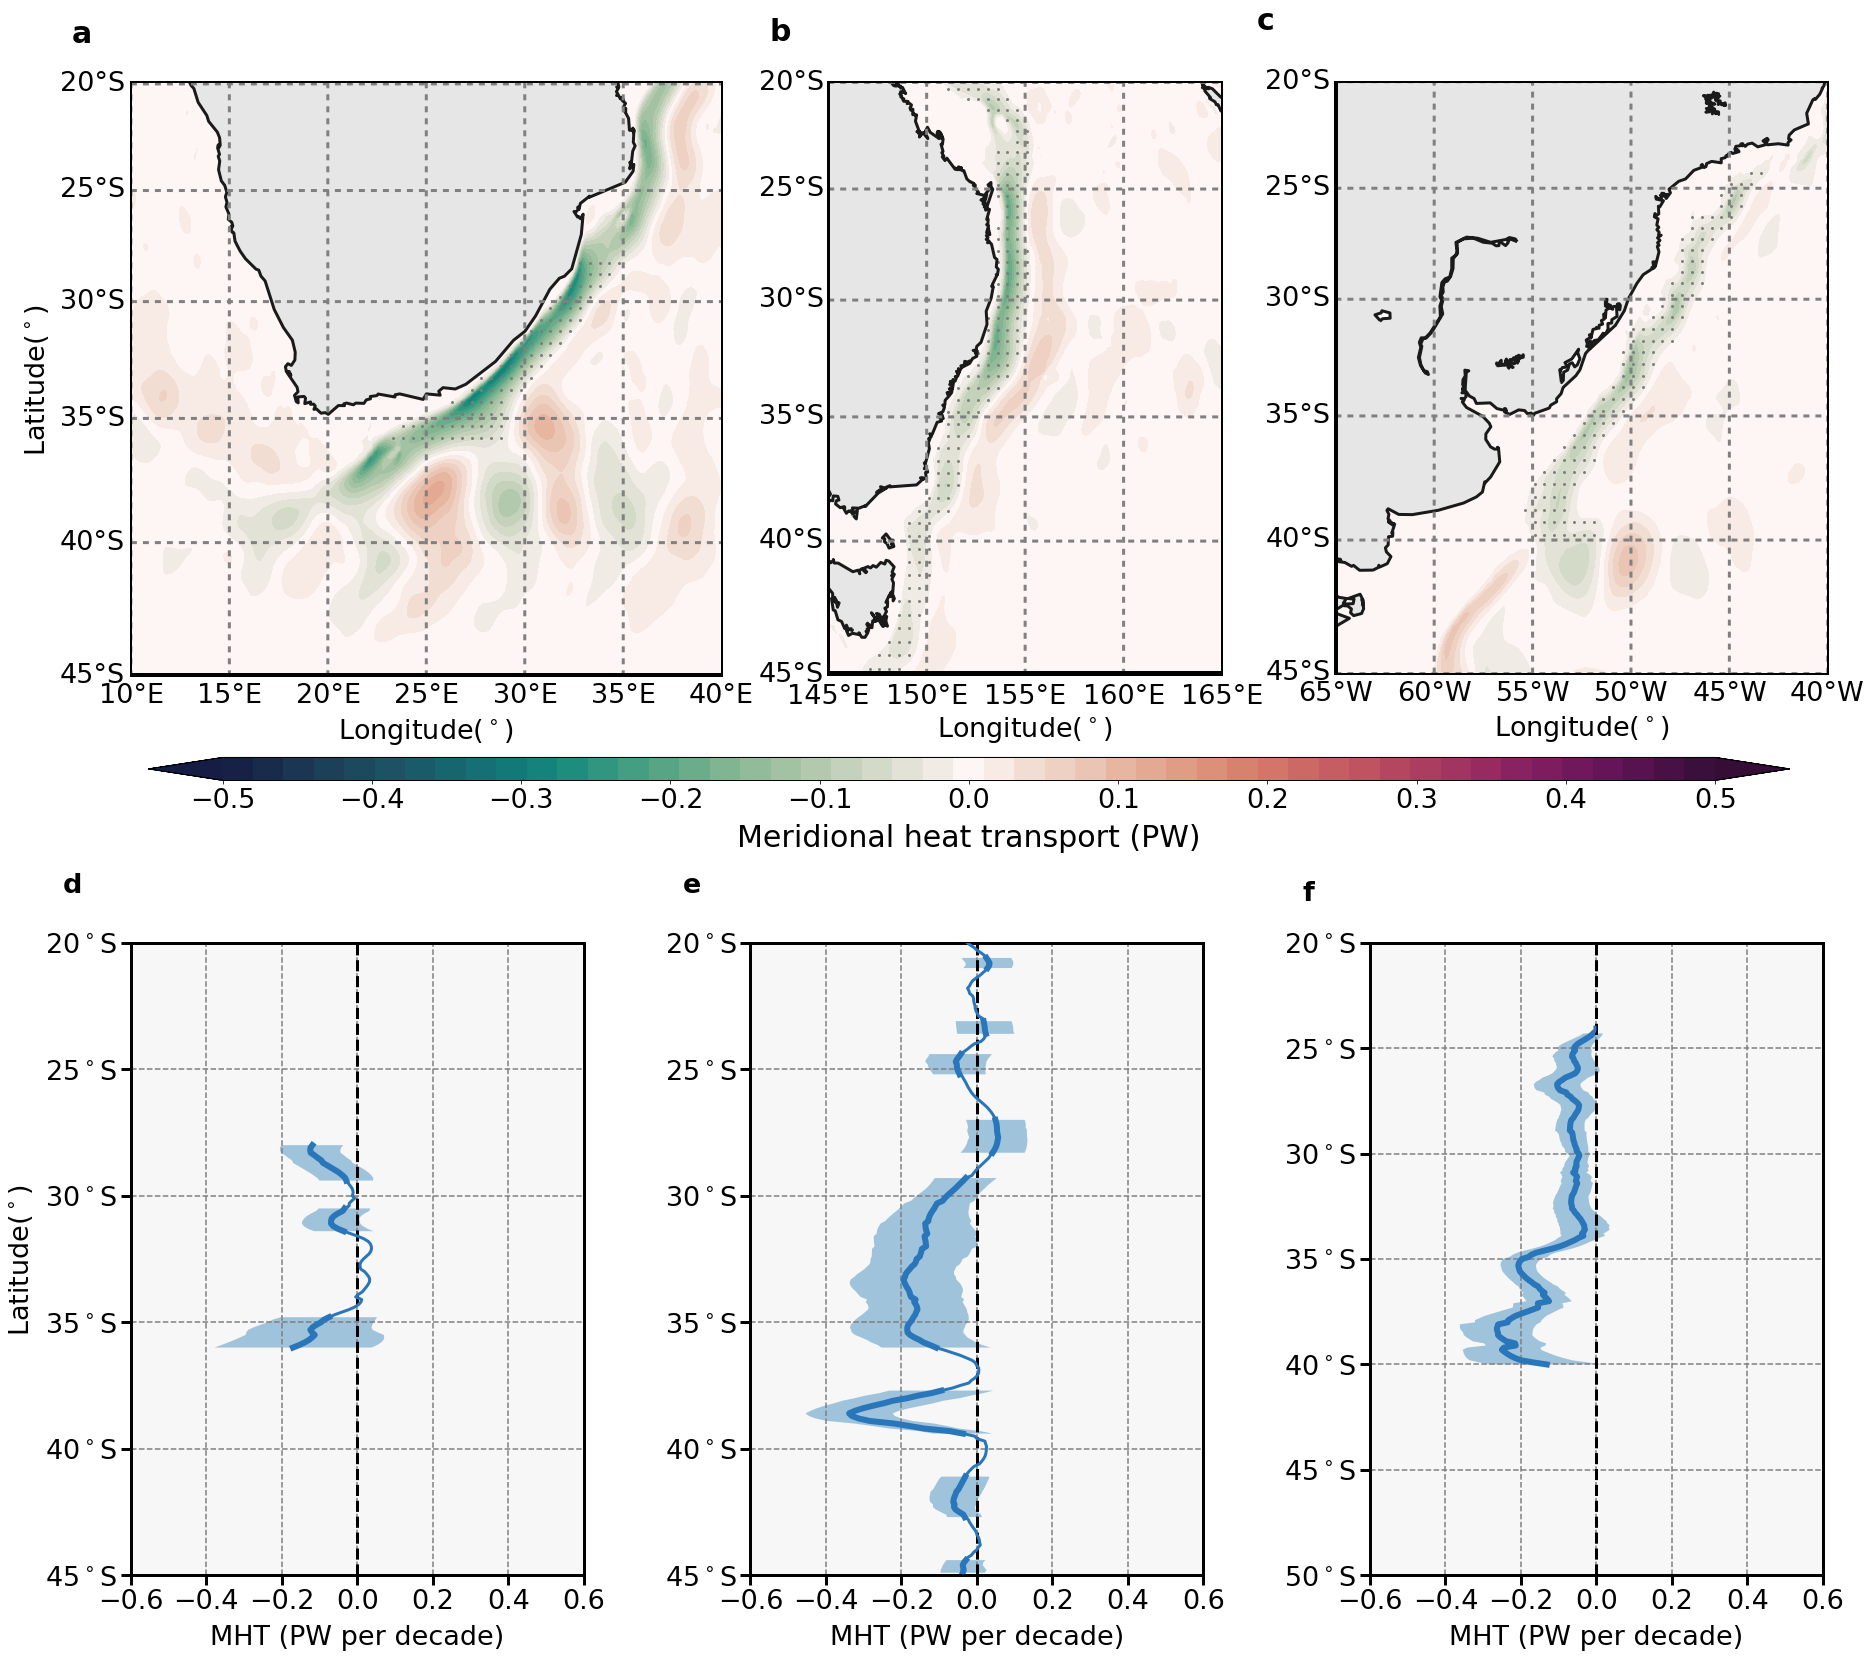

In [3]:
##############################################################################################################
labels        = ['a','b','c','d','e','f']
levels1       = np.linspace(-0.5,0.5,50)
levels2       = np.linspace(-5,5,50)
tick_marks1   = np.linspace(-0.5,0.5,11)
tick_marks2   = np.linspace(-5,5,11)
cmaps1        = cmaps.cmocean_curl
fig_ratio     = 0.9
fig           = plt.figure(figsize=(24, 32))
gs            = gridspec.GridSpec(2,3)
labelfont     = 30
padspacescale = 10
labelpadscale = 2
linefont      = 3
scale         = 1.0
m_scale       = 1   
##############################################################################################################
for i in range(3):
    ax = fig.add_subplot(gs[i])
    l, b, w, h = ax.get_position().bounds
    if i==0:
        lon   = bran_lon[1:500,152:503]      
        lat   = bran_lat[1:500,152:503]
        var = ARC_vt_transport  
        m     = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=10,urcrnrlon=40,resolution='l')                    
        cx,cy = m(7, -18.0)
        x, y  = m(lon, lat)
        yy = np.arange(1, y.shape[0], 5)
        xx = np.arange(1, x.shape[1], 5)
        points = np.meshgrid(yy, xx)
        point_index=tuple(points)
        stipple_p=ARC_vt_loc 
        point_x=x[point_index]
        point_y=y[point_index]
        point_z=stipple_p[point_index]
        point_x=np.ravel(point_x)
        point_y=np.ravel(point_y)
        point_z=np.ravel(point_z)
        point_x=point_x[~np.isnan(point_z)]
        point_y=point_y[~np.isnan(point_z)]
        CB1=m.contourf(x, y, var,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS1 = m.scatter(point_x,point_y,s=15*m_scale,c='xkcd:medium grey',marker='.') 
        plt.xlabel(r'Longitude($^\circ$)',fontsize=0.9*labelfont,labelpad=40,family='sans-serif') 
        plt.ylabel(r'Latitude($^\circ$)',fontsize=0.9*labelfont,labelpad=80,family='sans-serif') 
    elif i==1:
        l=l+0.13
        b=b+0.086
        lon = bran_lon[1449:1650,152:403]      
        lat = bran_lat[1449:1650,152:403] 
        var = EAC_vt_transport # EAC
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.0001,llcrnrlon=145-0.0,urcrnrlon=np.nanmax(lon),resolution='l')                    
        cx,cy = m(142, -18.0)
        x, y = m(lon, lat)
        yy = np.arange(1, y.shape[0], 5)
        xx = np.arange(1, x.shape[1], 5)
        points = np.meshgrid(yy, xx)
        point_index=tuple(points)
        stipple_p=EAC_vt_loc 
        point_x=x[point_index]
        point_y=y[point_index]
        point_z=stipple_p[point_index]
        point_x=np.ravel(point_x)
        point_y=np.ravel(point_y)
        point_z=np.ravel(point_z)
        point_x=point_x[~np.isnan(point_z)]
        point_y=point_y[~np.isnan(point_z)]
        CB1=m.contourf(x, y, var,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS1 = m.scatter(point_x,point_y,s=15*m_scale,c='xkcd:medium grey',marker='.') 
        plt.xlabel(r'Longitude($^\circ$)',fontsize=0.9*labelfont,labelpad=40,family='sans-serif') 
    elif i==2: 
        l=l+0.15
        b=b+0.0435
        lon = bran_lon[2949:3200,102:403]      
        lat = bran_lat[2949:3200,102:403] 
        var = BC_vt_transport #BC
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45-0.0001,urcrnrlat= -20+0.0001,llcrnrlon=np.nanmin(lon)-0.02,urcrnrlon=np.nanmax(lon),resolution='l')            
        cx,cy = m(291, -17.5)
        x, y = m(lon, lat)
        yy = np.arange(1, y.shape[0], 5)
        xx = np.arange(1, x.shape[1], 5)
        points = np.meshgrid(yy, xx)
        point_index=tuple(points)
        stipple_p=BC_vt_loc 
        point_x=x[point_index]
        point_y=y[point_index]
        point_z=stipple_p[point_index]
        point_x=np.ravel(point_x)
        point_y=np.ravel(point_y)
        point_z=np.ravel(point_z)
        point_x=point_x[~np.isnan(point_z)]
        point_y=point_y[~np.isnan(point_z)]
        CB1=m.contourf(x, y, var,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS1 = m.scatter(point_x,point_y,s=15*m_scale,c='xkcd:medium grey',marker='.') 
        plt.xlabel(r'Longitude($^\circ$)',fontsize=0.9*labelfont,labelpad=40,family='sans-serif') 
    m.drawparallels(np.arange(-60,-0, 5),labels=[1,0,0,0],linewidth=linefont,dashes=[2,2],color='.5',fontsize=0.9*labelfont,family='sans-serif')    
    m.drawmeridians(np.arange(0,360, 5),labels=[0,0,0,1],linewidth=linefont,dashes=[2,2],color='.5',fontsize=0.9*labelfont,family='sans-serif')
    m.drawcoastlines(color='0.1',  linewidth=linefont)
    m.fillcontinents(color='0.9', lake_color='white') 
    plt.text(cx, cy,labels[i],color='xkcd:black', fontsize=labelfont, weight='bold',family='sans-serif')
    m.plot(x[0,:],  y[0,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,0],  y[:,0],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[-1,:], y[-1,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,-1], y[:,-1],linewidth=linefont, linestyle='solid', color='k')
    ax.spines['left'].set_linewidth(labelpadscale)
    ax.spines['top'].set_linewidth(labelpadscale)
    ax.spines['right'].set_linewidth(labelpadscale)
    ax.spines['bottom'].set_linewidth(labelpadscale)
    plt.tick_params(axis='x',which='major',bottom='on',left='on',top='on',right='on',length=25,width=2,colors='black',direction='out')       
    cbaxes1     = fig.add_axes([0.135, 0.62, 0.95, 0.01])
    cb1 = plt.colorbar(CB1,orientation='horizontal',cax = cbaxes1)
    cb1.set_ticks(tick_marks1)
    cb1.ax.tick_params(labelsize=0.9*labelfont)
    cb1.set_label(r'Meridional heat transport (PW)', fontsize=labelfont,labelpad=10,family='sans-serif')
    ax.set_position([l, b, scale*w, scale*h]) 
    if i==0:
        ax.set_position([l, b, 1.5*scale*w, 1.5*scale*h])   
    elif i==1:
        ax.set_position([l, b, scale*w, scale*h])   
    else:
        ax.set_position([l, b, 1.25*scale*w, 1.25*scale*h]) 
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
linefont  = 3
for i in range(3):
    ax = fig.add_subplot(gs[i+3],facecolor='0.97')
    l, b, w, h = ax.get_position().bounds
    if i==0:
        plt.plot(ARC_vt_trend,  ARC_lat[0,:], color='xkcd:bluish',    linewidth=linefont,zorder=3)
        plt.plot(ARC_vt_trend1, ARC_lat[0,:], color='xkcd:bluish', linewidth=2*linefont)
        plt.fill_betweenx(ARC_lat[0,:],ARC_vt_trend-ARC_vt_std, ARC_vt_trend+ARC_vt_std ,alpha=0.4)
        plt.plot([0,0], [-45,-20], color='black', linewidth=linefont,linestyle='dashed')
        plt.ylim(-45,-20)
        ax.set_yticks(np.linspace(-45,-20,6))
        ax.set_yticklabels(['45$^\circ$S','40$^\circ$S','35$^\circ$S','30$^\circ$S','25$^\circ$S','20$^\circ$S'])
        plt.text(-0.78, -18,labels[i+3],color='xkcd:black', fontsize=0.9*labelfont, weight='bold',family='sans-serif')
        plt.ylabel(r'Latitude($^\circ$)',fontsize=0.9*labelfont,labelpad=10,family='sans-serif')   
    elif i==1:
        l=l+0.085
        plt.plot(EAC_vt_trend,  EAC_lat[0,:], color='xkcd:bluish',    linewidth=linefont,zorder=3)
        plt.plot(EAC_vt_trend1, EAC_lat[0,:], color='xkcd:bluish', linewidth=2*linefont)
        plt.fill_betweenx(EAC_lat[0,:],EAC_vt_trend-EAC_vt_std, EAC_vt_trend+EAC_vt_std ,alpha=0.4)
        plt.plot([0,0], [-45,-20], color='black', linewidth=linefont,linestyle='dashed')
        plt.ylim(-45,-20)
        ax.set_yticks(np.linspace(-45,-20,6))
        ax.set_yticklabels(['45$^\circ$S','40$^\circ$S','35$^\circ$S','30$^\circ$S','25$^\circ$S','20$^\circ$S'])
        plt.text(-0.78, -18.0,labels[i+3],color='xkcd:black', fontsize=0.9*labelfont, weight='bold',family='sans-serif')
    else:
        l=l+0.17
        plt.plot(BC_vt_trend,  BC_lat[0,:], color='xkcd:bluish',    linewidth=linefont,zorder=3)
        plt.plot(BC_vt_trend1, BC_lat[0,:], color='xkcd:bluish', linewidth=2*linefont)
        plt.fill_betweenx(BC_lat[0,:],BC_vt_trend-BC_vt_std,BC_vt_trend+BC_vt_std ,alpha=0.4)
        plt.plot([0,0], [-50,-20], color='black', linewidth=linefont,linestyle='dashed')
        plt.ylim(-50,-20)       
        ax.set_yticks(np.linspace(-50,-20,7))
        ax.set_yticklabels(['50$^\circ$S','45$^\circ$S','40$^\circ$S','35$^\circ$S','30$^\circ$S','25$^\circ$S','20$^\circ$S'])
        plt.text(-0.78, -18.0,labels[i+3],color='xkcd:black', fontsize=0.9*labelfont, weight='bold',family='sans-serif')
    plt.xlabel('MHT (PW per decade)',fontsize=0.9*labelfont,labelpad=10,family='sans-serif')
    plt.xlim(-0.6, 0.6)
    xminorLocator   = plt.MultipleLocator(0.1)
    xmajorLocator   = plt.MultipleLocator(0.2)
    xmajorFormatter = plt.FormatStrFormatter('%2.1f')
    plt.grid(color ="tab:gray",linestyle='dashed', linewidth=0.5*linefont)
    ax.spines['bottom'].set_linewidth(linefont)
    ax.spines['left'].set_linewidth(linefont)
    ax.spines['top'].set_linewidth(linefont)
    ax.spines['right'].set_linewidth(linefont)  
    plt.xticks(fontsize=0.9*labelfont)
    plt.yticks(fontsize=0.9*labelfont)
    plt.tick_params(axis='x',which='minor',bottom='on',left='on',length=6.0,width=linefont,colors='black',direction='out')
    plt.tick_params(axis='y',which='minor',bottom='on',left='on',length=6.0,width=linefont,colors='black',direction='out')
    plt.tick_params(bottom='on',left='on',length=10,width=linefont,colors='black',direction='out')
    if i==0:
        ax.set_position([l, b+0.15, 1.15*scale*w, 0.8*scale*h])   
    elif i==1:
        ax.set_position([l, b+0.15, 1.15*scale*w, 0.8*scale*h]) 
    else:
        ax.set_position([l, b+0.15, 1.15*scale*w, 0.8*scale*h]) 
fig.savefig(directory+'/BRAN_MHW/SO/daily/Figure3_vt_transport.pdf',dpi=300,bbox_inches = 'tight')